### Consider we have 3 different engines : A, B, C

Consider that respective enginge runs for cycle that we have to find out, & we have about 3 features which is going to help us: 

1. oil level

2. water level

3. gas level

### Consider a following scenario for after which cycle A engine stops

In [1]:
import pandas as pd
import numpy as np

In [2]:
#For Engine A

data_a = {
    "Engine_no" : ["A", "A", "A", "A", "A"],
    "Cycle_no" : [1, 2, 3, 4, 5],
    "oil_level" : [8, 7, 5, 4, 3],
    "water_level" : [10, 9, 9, 5, 4],
    "gas_level" : [30, 30, 23, 21, 20]
}

In [3]:
df1 = pd.DataFrame(data_a)

In [4]:
df1

,Engine_no,Cycle_no,oil_level,water_level,gas_level
0,A,1,8,10,30
1,A,2,7,9,30
2,A,3,5,9,23
3,A,4,4,5,21
4,A,5,3,4,20


### For this RUL for each corresponding value will be

RUL = Total Cycle - Current cycle

In [5]:
df1["RUL"] = 5 - df1["Cycle_no"]

In [6]:
df1

,Engine_no,Cycle_no,oil_level,water_level,gas_level,RUL
0,A,1,8,10,30,4
1,A,2,7,9,30,3
2,A,3,5,9,23,2
3,A,4,4,5,21,1
4,A,5,3,4,20,0


### Now similary for other engines & finding the RUL

In [7]:
#For Engine B

data_b = {
    "Engine_no" : ["B", "B", "B", "B", "B", "B", "B"],
    "Cycle_no" : [1, 2, 3, 4, 5, 6, 7],
    "oil_level" : [7, 7, 6.5, 6, 6, 5.5, 5],
    "water_level" : [11, 11, 10, 9, 9, 5, 4],
    "gas_level" : [32, 31, 30, 30, 23, 21, 20]
}

In [8]:
df2 = pd.DataFrame(data_b)

In [9]:
df2

,Engine_no,Cycle_no,oil_level,water_level,gas_level
0,B,1,7.0,11,32
1,B,2,7.0,11,31
2,B,3,6.5,10,30
3,B,4,6.0,9,30
4,B,5,6.0,9,23
5,B,6,5.5,5,21
6,B,7,5.0,4,20


In [10]:
df2["RUL"] = 7 - df2["Cycle_no"]

In [11]:
df2

,Engine_no,Cycle_no,oil_level,water_level,gas_level,RUL
0,B,1,7.0,11,32,6
1,B,2,7.0,11,31,5
2,B,3,6.5,10,30,4
3,B,4,6.0,9,30,3
4,B,5,6.0,9,23,2
5,B,6,5.5,5,21,1
6,B,7,5.0,4,20,0


In [12]:
#For Engine C

data_c = {
    "Engine_no" : ["C", "C", "C"],
    "Cycle_no" : [1, 2, 3],
    "oil_level" : [9, 6, 5],
    "water_level" : [10, 9, 8],
    "gas_level" : [30, 30, 28]
}

In [13]:
df3 = pd.DataFrame(data_c)

In [14]:
df3

,Engine_no,Cycle_no,oil_level,water_level,gas_level
0,C,1,9,10,30
1,C,2,6,9,30
2,C,3,5,8,28


In [15]:
df3["RUL"] = 3 - df3["Cycle_no"]

In [16]:
df3

,Engine_no,Cycle_no,oil_level,water_level,gas_level,RUL
0,C,1,9,10,30,2
1,C,2,6,9,30,1
2,C,3,5,8,28,0


### Let's combine all the df for a while

In [17]:
combine_df = pd.concat([df1, df2, df3], ignore_index = True)

In [18]:
combine_df

,Engine_no,Cycle_no,oil_level,water_level,gas_level,RUL
0,A,1,8.0,10,30,4
1,A,2,7.0,9,30,3
2,A,3,5.0,9,23,2
3,A,4,4.0,5,21,1
4,A,5,3.0,4,20,0
5,B,1,7.0,11,32,6
6,B,2,7.0,11,31,5
7,B,3,6.5,10,30,4
8,B,4,6.0,9,30,3
9,B,5,6.0,9,23,2


Here our main target is to find RUL irrespective of engine_no, we can find it by current cycle no, oil_level, water_level, gas_level.

So engine_no doesn't have any significance now, we can drop that

In [19]:
combine_df.drop(["Engine_no"], axis = 1, inplace = True)

In [20]:
combine_df

,Cycle_no,oil_level,water_level,gas_level,RUL
0,1,8.0,10,30,4
1,2,7.0,9,30,3
2,3,5.0,9,23,2
3,4,4.0,5,21,1
4,5,3.0,4,20,0
5,1,7.0,11,32,6
6,2,7.0,11,31,5
7,3,6.5,10,30,4
8,4,6.0,9,30,3
9,5,6.0,9,23,2


In [21]:
#Let's train data on any of the ML algorithm

x_train = combine_df[["Cycle_no", "oil_level", "water_level", "gas_level"]]
y_train = combine_df[["RUL"]]

In [22]:
x_train

,Cycle_no,oil_level,water_level,gas_level
0,1,8.0,10,30
1,2,7.0,9,30
2,3,5.0,9,23
3,4,4.0,5,21
4,5,3.0,4,20
5,1,7.0,11,32
6,2,7.0,11,31
7,3,6.5,10,30
8,4,6.0,9,30
9,5,6.0,9,23


In [23]:
y_train

,RUL
0,4
1,3
2,2
3,1
4,0
5,6
6,5
7,4
8,3
9,2


In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(x_train, y_train)

LinearRegression()

In [27]:
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

Coefficient (slope): [0.11417743 0.06048536 0.56596964 0.05036691]
Intercept: [-4.44993594]


In [38]:
#Testing dataset

new = np.array([[7, 5, 4, 20]])

In [39]:
pred = model.predict(new)

c:\Users\Ayush Gandhi\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [40]:
pred

array([[-0.07705037]])

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [32]:
tree_model = DecisionTreeRegressor()

In [33]:
tree_model.fit(x_train, y_train)

DecisionTreeRegressor()

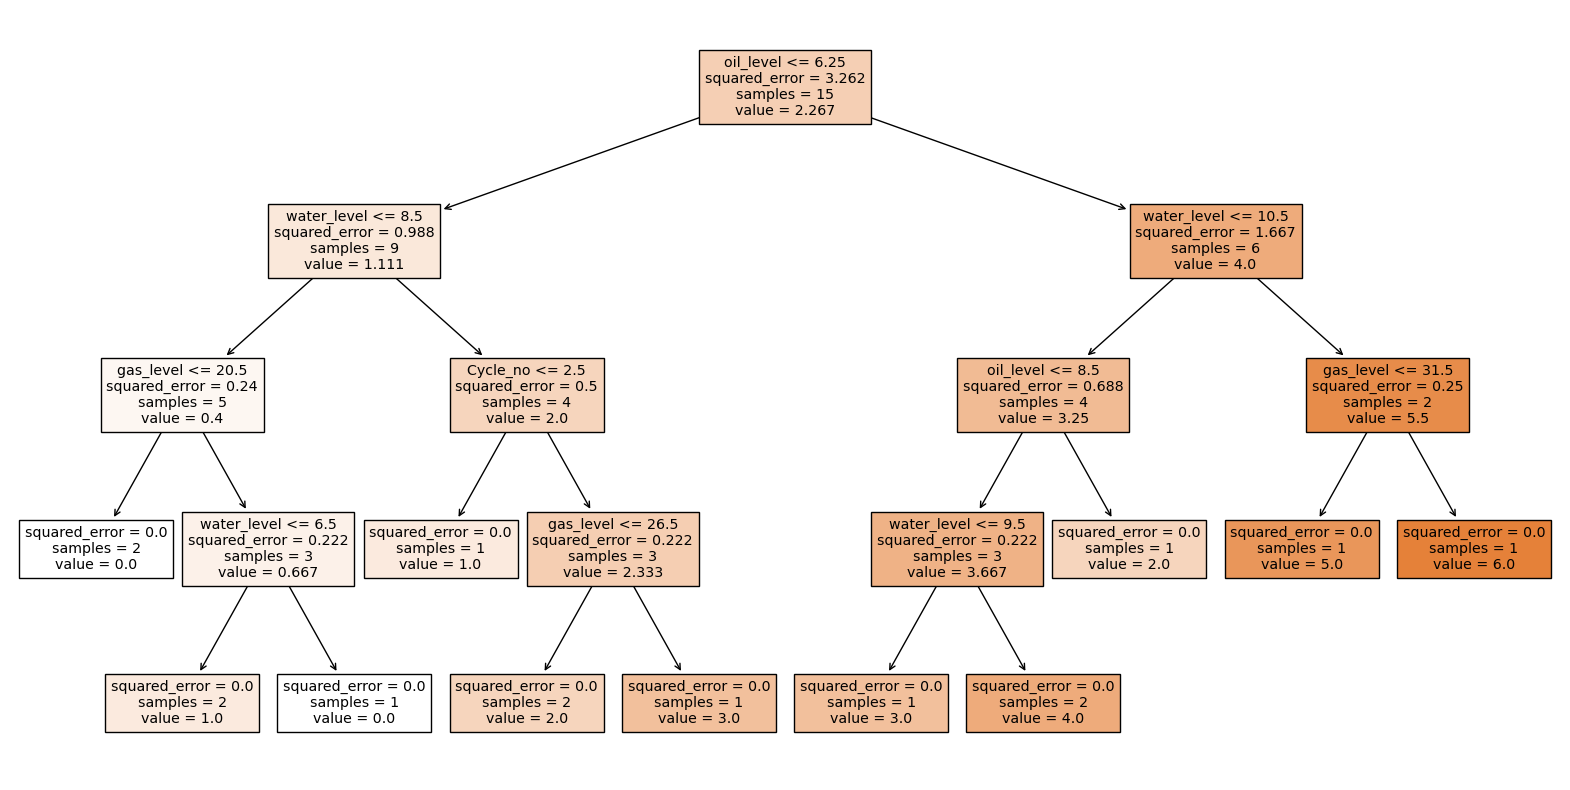

In [34]:
plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plot_tree(tree_model, filled=True, feature_names=["Cycle_no", "oil_level", "water_level", "gas_level"])
plt.show()

In [42]:
pred = tree_model.predict(new)

c:\Users\Ayush Gandhi\anaconda3\envs\DataScience\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [41]:
#Testing dataset

new = np.array([[7, 5, 4, 20]])

In [43]:
pred

array([0.])